# Libraries

In [3]:
# Data Manipulation & analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

# Modeling
!pip install boruta
from boruta import BorutaPy 

from sklearn.feature_selection import RFE, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import xgboost as xgb

# Evaluation
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# Other Set Up
from datetime import datetime
import os
import warnings
from pprint import pprint

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Styling 

In [4]:
# Set style for displaying data
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Set style for plotting
sns.set_style("whitegrid")

# Data Import

In [5]:
boston = load_boston()
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Set panda dataframe
boston_data = pd.DataFrame(boston.data)

# Set column names
boston_data.columns = boston.feature_names

# Set target
boston_target=pd.DataFrame(boston.target)
boston_target.columns=['PRICE']

# Merge into 1 data frame
boston_df = pd.merge(boston_data,boston_target,left_index = True, right_index = True)

data = boston_df

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data_desc = data.describe()
data_desc.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,3.61352,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531,22.5328
std,8.60155,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106,9.1971
min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
25%,0.082045,0,5.19,0,0.449,5.8855,45.025,2.10018,4,279,17.4,375.377,6.95,17.025
50%,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36,21.2
75%,3.67708,12.5,18.1,0,0.624,6.6235,94.075,5.18843,24,666,20.2,396.225,16.955,25
max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50


## Sampling Data Set (Decrease Size)

In [9]:
rows = data.sample(frac =.25)

# Visualization

# Heatmap

(14.5, -0.5)

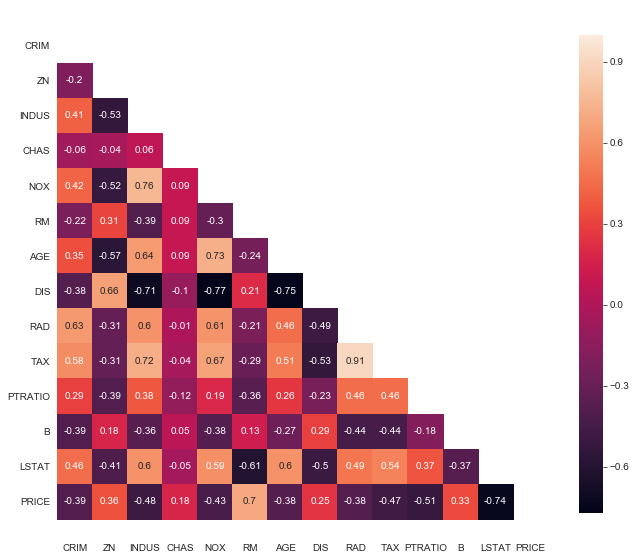

In [10]:
# Compute correlation matrix
corr = boston_df.corr().round(2)

# Set figure options
fig,  ax = plt.subplots(figsize=(11,11),nrows=1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate heatmap including mask, and correct aspect ratio
sns.heatmap(corr, mask=mask, square=True,annot=True, cbar_kws={"shrink": .8})

# Fix axis
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Set Targets

In [11]:
x = 'RM'
y = 'PRICE'

## Find dist, mean, median

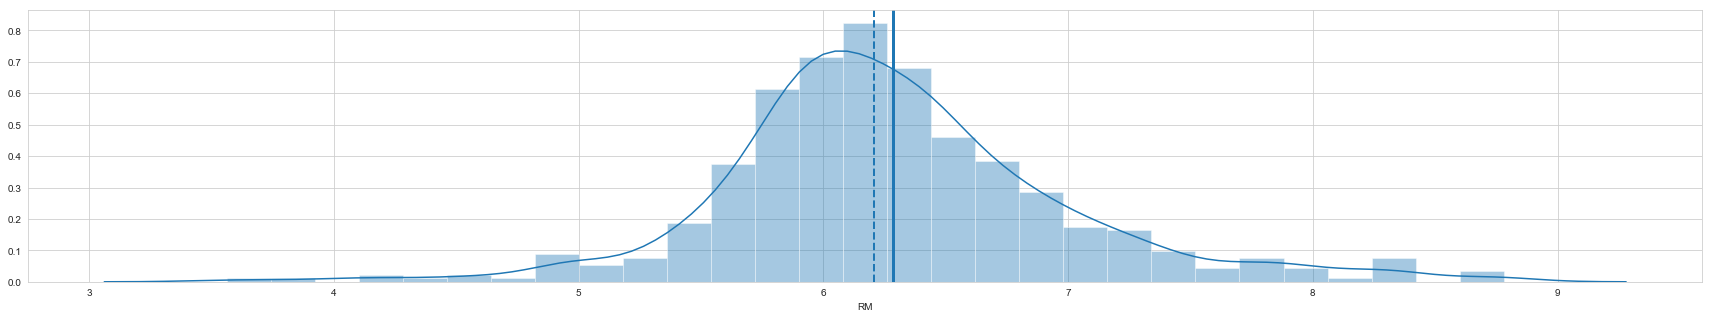

In [13]:
fig,  ax = plt.subplots(ncols=1,figsize=(30,5),nrows=1)

sns.distplot(data[x])
ax.axvline(data[x].mean(), linestyle='solid', linewidth=3)
ax.axvline(data[x].median(),  linestyle='dashed', linewidth=2)

## Across multiple variables

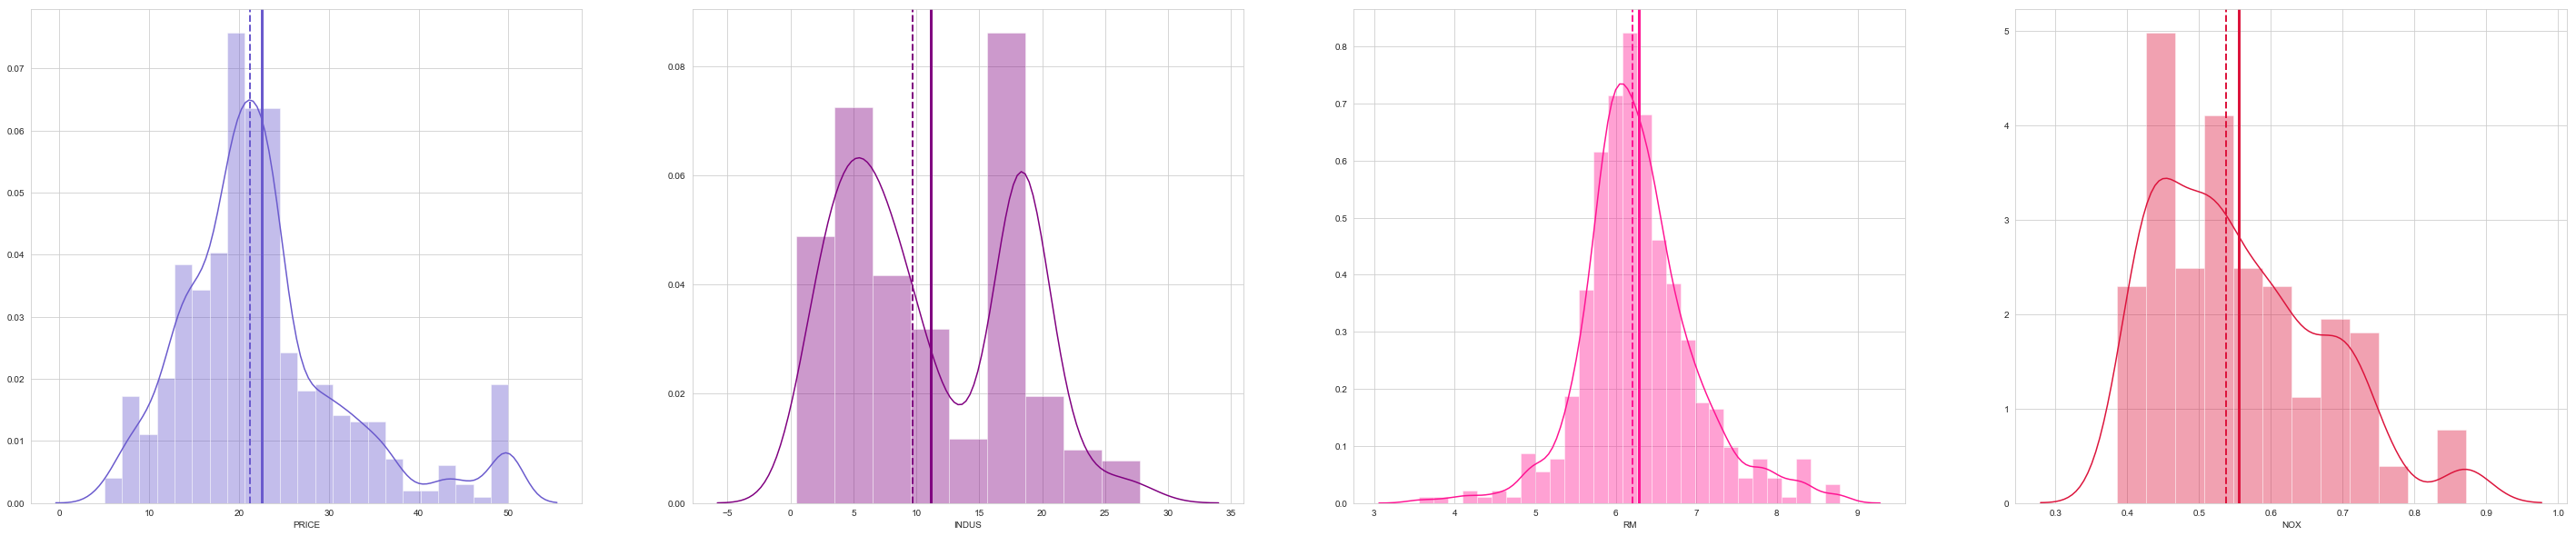

In [14]:
canditate_features = ['PRICE', 'INDUS', 'RM', 'NOX']

# Set colors
clr = ['slateblue', 'purple', 'deeppink','crimson'] 

## Create plots for Univariate distributions, means, medians

# Create  empty subplots
fig,  ax = plt.subplots(ncols=4,figsize=(50,10),nrows=1)

# Select features to check and loop through
for i, var in enumerate(canditate_features):
    sns.distplot(data[var],  color = clr[i], ax=ax[i])
    ax[i].axvline(data[var].mean(), color=clr[i], linestyle='solid', linewidth=3)
    ax[i].axvline(data[var].median(), color=clr[i], linestyle='dashed', linewidth=2)

## Scatterplot

In [15]:
ax=sns.relplot(x="totcalls", y="months",hue="churn",kind="scatter", data=data)

ValueError: Could not interpret input 'totcalls'

## Plot Catagorical

In [16]:
categ_nominal_noArea = data[categ_nominal].drop("area",axis=1)

 

plt.figure(figsize=(12,25))
for k in range(1,len(categ_nominal_noArea.columns)):
    plt.subplot(6,3,k)
    sns.countplot(x=categ_nominal_noArea.columns[k], data=data,hue='churn')

NameError: name 'categ_nominal' is not defined

## Pair Plot with hue for Target

In [ ]:
# Generate pairplots for selected features.
features = ['eqpdays','months', 'totcalls','churn']

sns.pairplot(data[features], hue = 'churn')